In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

In [23]:
df=pd.read_csv("daily-min-temperatures.csv",delimiter=',')

In [24]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [25]:
df.isnull().sum()

Date    0
Temp    0
dtype: int64

<Axes: >

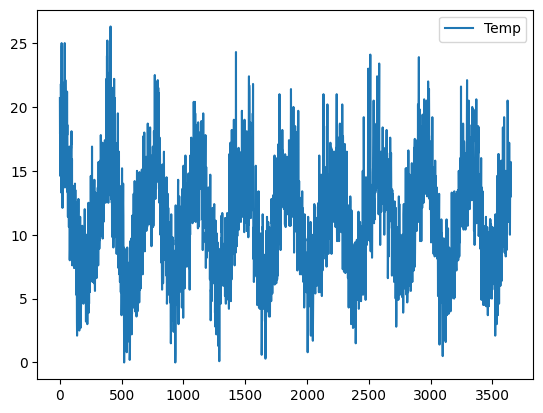

In [26]:
df.plot()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [28]:
df['Date'].head()

0    1981-01-01
1    1981-01-02
2    1981-01-03
3    1981-01-04
4    1981-01-05
Name: Date, dtype: object

In [29]:
series=pd.read_csv('daily-min-temperatures.csv',header=0,index_col=0,parse_dates=True)

In [57]:
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [30]:
#automatic differencing
differenced_series=series.diff(periods=1)

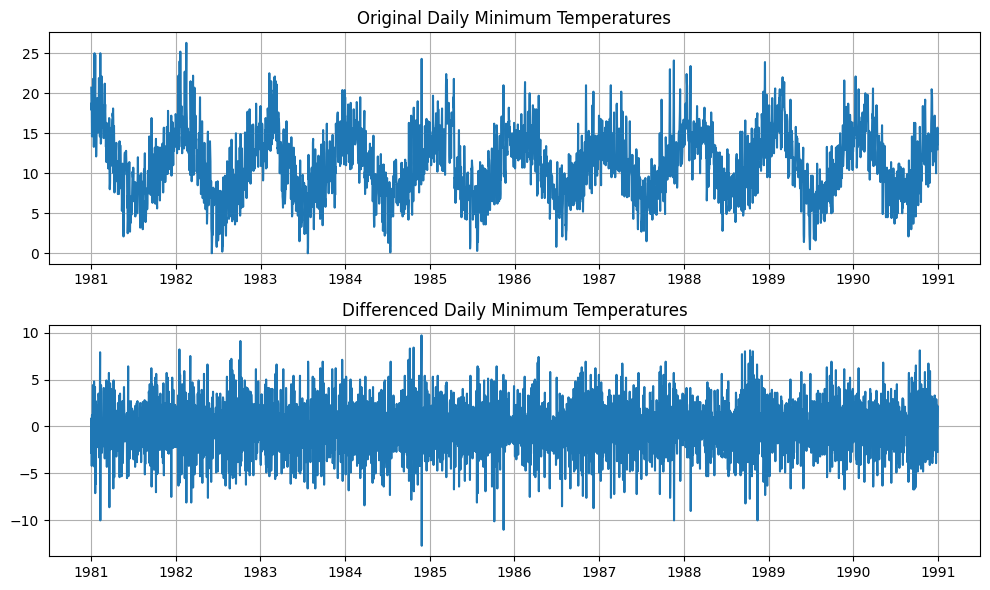

In [32]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(series,label='Original Series')
plt.title('Original Daily Minimum Temperatures')
plt.grid()
plt.subplot(2,1,2)
plt.plot(differenced_series,label='differenced Series')
plt.title('Differenced Daily Minimum Temperatures')
plt.grid()
plt.tight_layout()
plt.show()

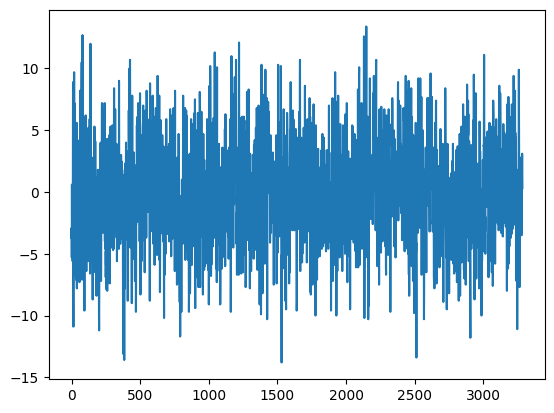

In [35]:
#manual differencing
series=pd.read_csv('daily-min-temperatures.csv',header=0,index_col=0)
X=series.values
diff=list()
days_in_year=365
for i in range(days_in_year,len(X)):
    value=X[i]-X[i-days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

In [37]:
df_temp=pd.read_csv('daily-min-temperatures.csv',header=0,index_col=0)
df_temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [43]:
#FIRST ORDER DIFFERENCE (lag 1)
df_temp['diff']=df_temp['Temp'].diff(periods=1)

In [44]:
df_temp.head()

,Temp,diff
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,-2.8
1981-01-03,18.8,0.9
1981-01-04,14.6,-4.2
1981-01-05,15.8,1.2


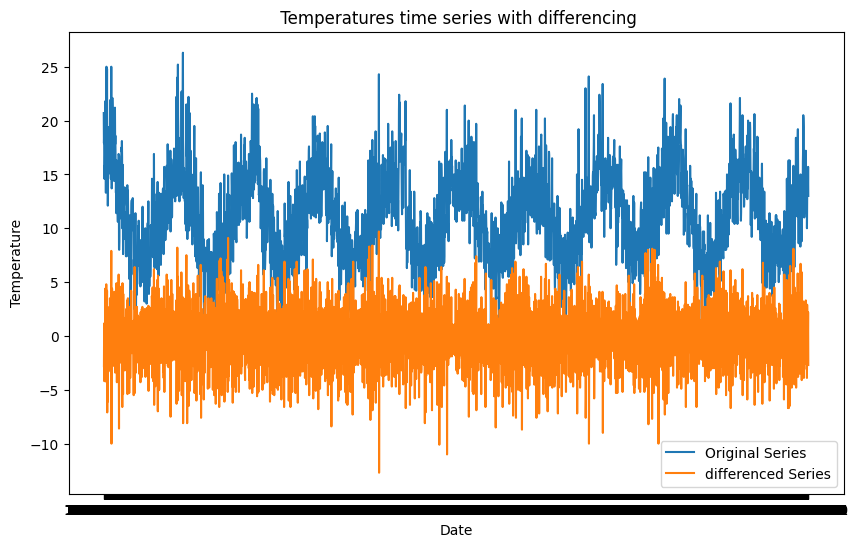

In [48]:
plt.figure(figsize=(10,6))
plt.plot(df_temp.index,df_temp['Temp'],label='Original Series')
plt.plot(df_temp.index,df_temp['diff'],label='differenced Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title(' Temperatures time series with differencing')
plt.legend()
plt.show()

In [ ]:
#polynomial model

In [49]:
from pandas import read_csv
from numpy import  polyfit
from matplotlib import pyplot 

In [50]:
series=read_csv('daily-min-temperatures.csv',header=0,index_col=0)

In [51]:
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [59]:
#fitt polynomial
X=[i%365 for i in range(0,len(series))]
y=series.values
degree=4
coef=polyfit(X,y,degree)
print('Coefficient : %s'% coef)
#curve
curve=list()
for i in range(len(X)):
    value=coef[-1]
    for d in range(degree):
        value+=X[i]**(degree-d)* coef[d]
        curve.append(value)
#seasonaly adjusted
values=series.values
diff=list()

Coefficient : [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


In [ ]:
for i in range(len(X)):
    value=values[i]-curve[i]